## 回帰診断について

回帰診断とは、回帰モデルの適合性や信頼性を評価するために、モデルの残差やその他の指標を分析する手法の総称です。回帰診断を行うことで、モデルの仮定が満たされているかどうか、異常値や影響力の強い観測値が存在するかどうか、モデルの予測性能が適切であるかどうかを確認することができます。

### 主な回帰診断の方法

1. **残差プロット**:
    残差プロットは、予測値と残差の関係を視覚化したものです。残差プロットを観察することで、モデルの線形性、等分散性、独立性の仮定が満たされているかを確認できます。理想的には、残差はランダムに散らばっており、特定のパターンを持たないはずです。

2. **正規Q-Qプロット**:
    残差が正規分布に従うかを確認するために使用します。正規Q-Qプロットで残差が45度の直線に近い場合、残差は正規分布に従っていると判断できます。

3. **標準化残差と外れ値の検出**:
    標準化残差（または学生化残差）は、残差のスケールを調整したもので、異常値や外れ値の検出に使用されます。標準化残差の絶対値が大きい場合、その観測値は外れ値とみなされる可能性があります。

4. **影響力の強い観測値の検出**:
    クックの距離やレバレッジ値を用いて、影響力の強い観測値（データポイント）を特定します。これらの指標は、特定の観測値が回帰モデルにどれほどの影響を与えるかを示します。

5. **分散拡大要因（VIF）**:
    多重共線性の存在を評価するために使用されます。VIFが高い場合、説明変数間に強い相関があり、回帰係数の推定が不安定になる可能性があります。

### Pythonコード例

以下に、回帰診断の一部を行うPythonコードの例を示します。



このコードは、以下の回帰診断を実行します。

1. 残差プロット
2. 正規Q-Qプロット
3. 標準化残差のヒストグラム
4. クックの距離プロット

これにより、モデルの仮定や外れ値、影響力の強い観測値を視覚的に確認できます。

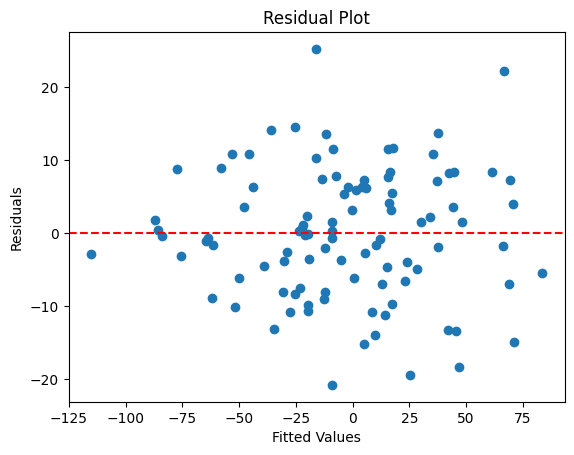

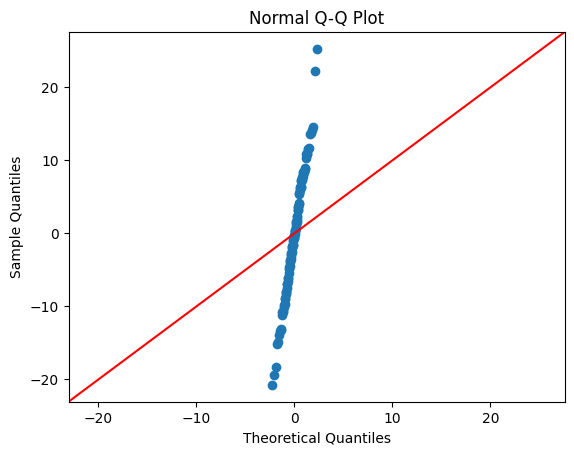

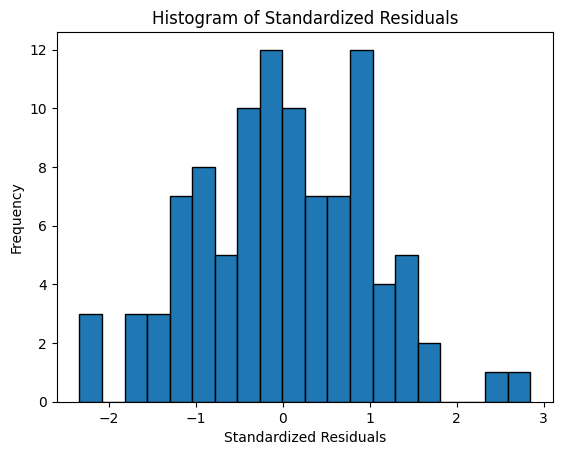

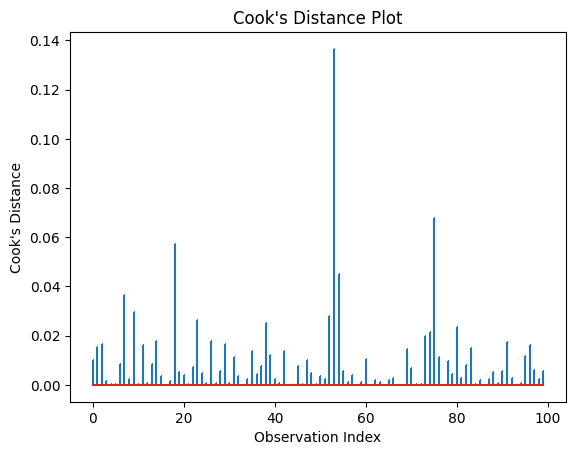

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# データセットの作成
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)
X = sm.add_constant(X)  # 切片項を追加

# 回帰モデルのフィッティング
model = sm.OLS(y, X).fit()

# 残差の計算
residuals = model.resid

# 残差プロット
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

# 正規Q-Qプロット
sm.qqplot(residuals, line='45')
plt.title('Normal Q-Q Plot')
plt.show()

# 標準化残差の計算
standardized_residuals = model.get_influence().resid_studentized_internal

# 標準化残差のヒストグラム
plt.hist(standardized_residuals, bins=20, edgecolor='k')
plt.xlabel('Standardized Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Standardized Residuals')
plt.show()

# クックの距離
influence = model.get_influence()
cooks_d = influence.cooks_distance[0]

# クックの距離のプロット
plt.stem(np.arange(len(cooks_d)), cooks_d, markerfmt=",")
plt.xlabel('Observation Index')
plt.ylabel("Cook's Distance")
plt.title("Cook's Distance Plot")
plt.show()


## 残差プロットとは

残差プロット（Residual Plot）は、回帰分析においてモデルの適合度や誤差のパターンを視覚的に評価するために使用されるグラフです。横軸に予測値（または独立変数）、縦軸に残差（実際の値と予測値の差）をプロットします。以下に残差プロットの主な特徴と用途について説明します。

### 主な特徴
- **横軸（x軸）**: 予測値または独立変数の値
- **縦軸（y軸）**: 残差（実際の値 - 予測値）
- **点の分布**: 点が無作為に分布していれば、モデルがデータに対して適切にフィットしていることを示唆します。特定のパターン（例えば、U字型や逆U字型）が見られる場合、モデルがデータをうまくキャプチャしていない可能性があります。

### 用途
1. **モデルの適合度確認**: 残差がランダムに分布しているかどうかを確認することで、モデルがデータにうまくフィットしているかどうかを評価します。
2. **非線形性の検出**: 残差プロットにパターンが見られる場合、データとモデルの間に非線形性が存在することを示唆します。この場合、非線形モデルの採用を検討する必要があります。
3. **外れ値の検出**: 異常に大きな残差を持つデータポイント（外れ値）を視覚的に確認できます。
4. **等分散性の確認**: 残差の分散が一定かどうかを確認します。残差が一定の範囲内に分布している場合、等分散性（ホモスケダスティシティ）が仮定されていることを示します。逆に、残差の分散が増減する場合、異分散性（ヘテロスケダスティシティ）が存在することを示唆します。

## 正規Q-Qプロットとは

正規Q-Qプロット（Quantile-Quantile Plot）は、データの分布が正規分布に従っているかどうかを視覚的に評価するためのグラフです。具体的には、データの分位点と正規分布の分位点を比較することで、データがどの程度正規分布に近いかを確認します。

### 主な特徴
- **横軸（x軸）**: 理論的な正規分布の分位点
- **縦軸（y軸）**: 実際のデータの分位点
- **点の分布**: 点が45度の直線上にほぼ沿っていれば、データは正規分布に近いことを示します。点が直線から大きく外れている場合、データは正規分布から逸脱していることを示唆します。

### 用途
1. **正規性の確認**: データが正規分布に従っているかどうかを評価します。多くの統計手法はデータが正規分布に従うことを前提としているため、この確認は重要です。
2. **外れ値の検出**: Q-Qプロットを使うことで、データの外れ値を視覚的に確認できます。
3. **データ分布の理解**: データの分布形状を理解するための手助けとなります。

## 標準残差の絶対値の平方根プロット

標準残差の絶対値の平方根プロット（Scale-Location Plot, スケール-ロケーションプロット）は、回帰モデルの適合度と残差の均一性を評価するために使用されます。このプロットは、残差の分散が予測値に対して一定であるかどうか（等分散性）を視覚的に確認するのに役立ちます。

### 主な特徴
- **横軸（x軸）**: 予測値
- **縦軸（y軸）**: 標準残差の絶対値の平方根
- **点の分布**: 点がランダムに分布し、特定のパターンが見られない場合、残差の分散が一定であることを示唆します。残差が広がったり狭まったりする場合、異分散性が存在する可能性があります。

### 用途
1. **等分散性の確認**: 残差の分散が一定であるかを確認することで、モデルがデータに適切にフィットしているかどうかを評価します。
2. **異分散性の検出**: 縦軸に特定のパターン（例えば、ファン型に広がるなど）が見られる場合、残差の分散が予測値に依存していることを示唆します。
3. **モデルの適合度確認**: 等分散性が確認されると、モデルの適合度が高いことを示します。

## LeverageとCookの距離とそのプロットについて

**Leverage**（レバレッジ）と**Cookの距離**（Cook's Distance）は、回帰分析においてデータポイントの影響度を評価するための指標です。これらの指標をプロットすることで、外れ値や影響力の大きいデータポイントを視覚的に特定できます。

### Leverageとは
Leverageは、各データポイントが回帰モデルにどの程度影響を与えているかを示す指標です。Leverageが高いデータポイントは、他のデータポイントに比べて回帰直線を大きく左右する可能性があります。Leverageの値は0から1の範囲であり、値が高いほどその点の影響力が大きいことを意味します。

### Cookの距離とは
Cookの距離は、特定のデータポイントを除外したときに回帰モデルのパラメータ推定値がどの程度変わるかを示す指標です。Cookの距離が大きいデータポイントは、モデル全体に大きな影響を与えることを示します。

### LeverageとCookの距離のプロット
LeverageとCookの距離をプロットすることで、どのデータポイントが回帰モデルに大きな影響を与えているかを視覚的に確認できます。通常、縦軸に標準化残差、横軸にLeverageを取り、Cookの距離の等高線を描くプロットが使用されます。

## サンプルデータの作成と分析

ここでは、サンプルデータを生成し、以下の4つのプロットをまとめて表示します。

1. 残差プロット
2. 正規Q-Qプロット
3. 標準残差の絶対値の平方根プロット
4. LeverageとCookの距離のプロット

### 分析結果

1. **残差プロット**:
    - 残差プロットでは、点が横軸に対してランダムに分布している場合、モデルがデータに適切にフィットしていることを示唆します。このプロットでパターンが見られた場合、モデルの適合度が不十分である可能性があります。

2. **正規Q-Qプロット**:
    - 正規Q-Qプロットは、残差が正規分布に従うかどうかを評価します。点が45度の直線上に沿っていれば、残差が正規分布に近いことを示します。直線から外れる場合、正規性の仮定が成り立たないことを示します。

3. **標準残差の絶対値の平方根プロット**:
    - 標準残差の絶対値の平方根プロットは、等分散性を確認するために使用されます。残差がランダムに分布していれば、等分散性が成り立つことを示します。パターンが見られる場合、異分散性が存在する可能性があります。

4. **LeverageとCookの距離のプロット**:
    - LeverageとCookの距離のプロットは、回帰モデルに大きな影響を与えるデータポイントを特定するために使用されます。影響力の大きいデータポイントが存在する場合、モデルの再評価が必要です。

これらのプロットを使って、モデルの適合度やデータの特性を総合的に評価することができます。

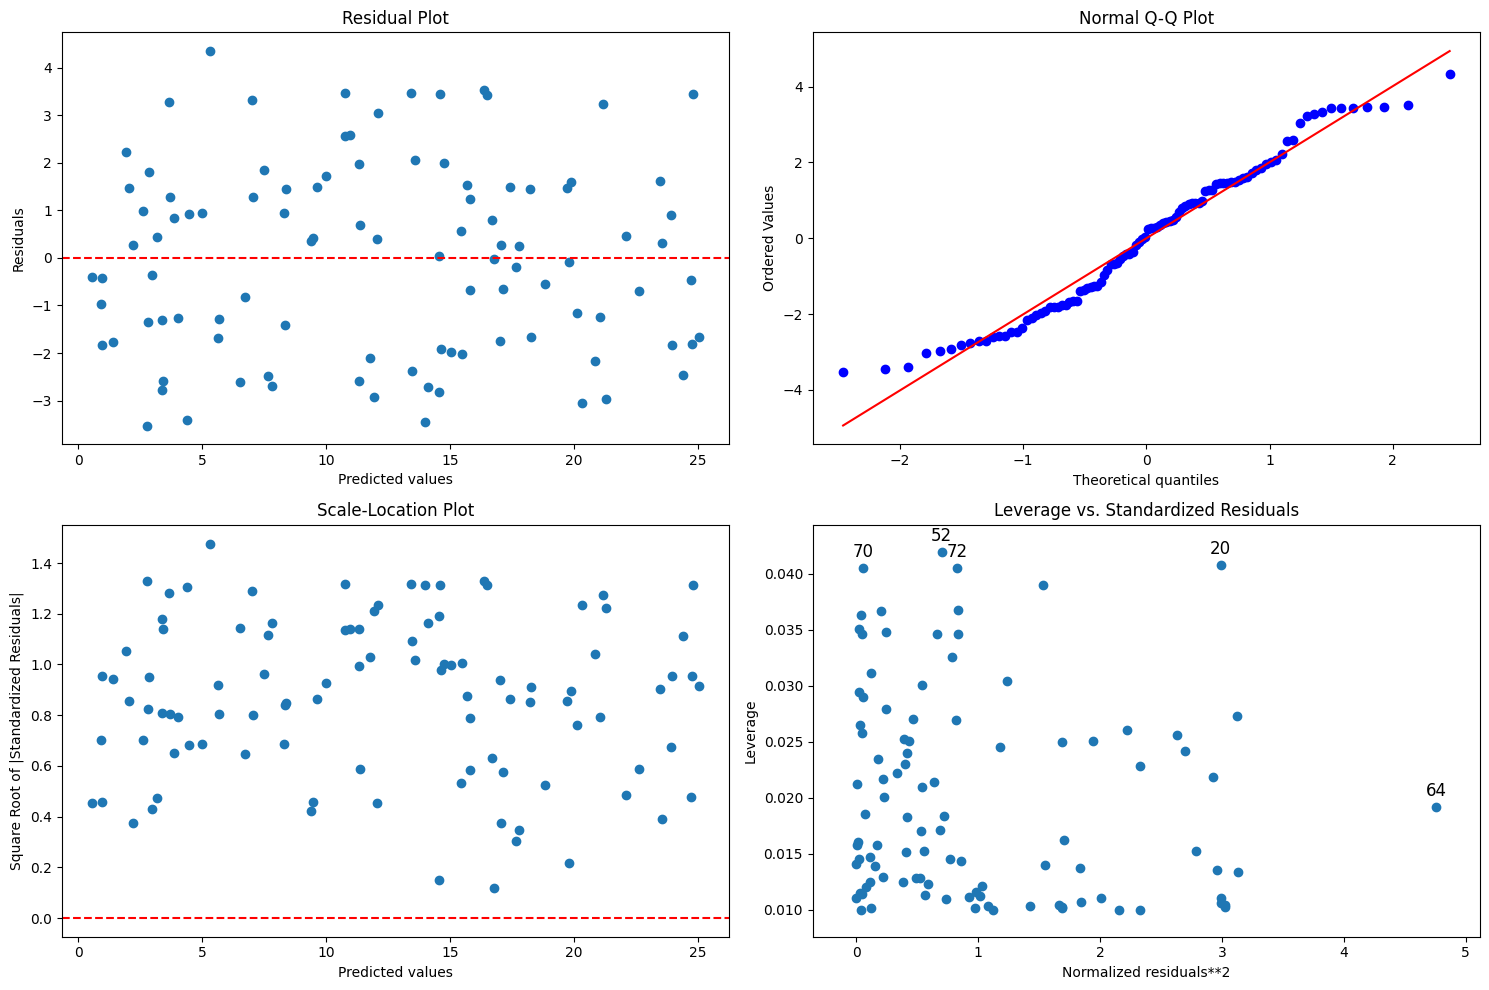

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.linear_model import LinearRegression
from statsmodels.graphics.regressionplots import plot_leverage_resid2

# サンプルデータの作成
np.random.seed(0)
X = np.random.rand(100, 1) * 10
y = 2.5 * X.squeeze() + np.random.randn(100) * 2

# 線形回帰モデルのフィッティング
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)
residuals = y - y_pred

# 定数項を追加したデザイン行列
X_with_const = sm.add_constant(X)

# OLS回帰モデルのフィッティング（statsmodelsを使用）
ols_model = sm.OLS(y, X_with_const).fit()
standardized_residuals = residuals / np.std(residuals)

# プロットの作成
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# 残差プロット
axs[0, 0].scatter(y_pred, residuals)
axs[0, 0].axhline(y=0, color='r', linestyle='--')
axs[0, 0].set_xlabel('Predicted values')
axs[0, 0].set_ylabel('Residuals')
axs[0, 0].set_title('Residual Plot')

# 正規Q-Qプロット
stats.probplot(residuals, dist="norm", plot=axs[0, 1])
axs[0, 1].set_title('Normal Q-Q Plot')

# 標準残差の絶対値の平方根プロット
axs[1, 0].scatter(y_pred, np.sqrt(np.abs(standardized_residuals)))
axs[1, 0].axhline(y=0, color='r', linestyle='--')
axs[1, 0].set_xlabel('Predicted values')
axs[1, 0].set_ylabel('Square Root of |Standardized Residuals|')
axs[1, 0].set_title('Scale-Location Plot')

# Leverage vs. 標準化残差のプロット（Cookの距離の等高線を含む）
plot_leverage_resid2(ols_model, ax=axs[1, 1])
axs[1, 1].set_title('Leverage vs. Standardized Residuals')

plt.tight_layout()
plt.show()